In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
comp = pd.read_csv("C:/Users/Pooja/Desktop/data science/assignments/Random forest/Company_Data.csv")
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
comp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

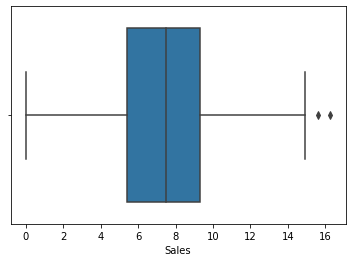

In [5]:
sns.boxplot(comp["Sales"])

In [6]:
# Data has 2 outlier instances.

In [7]:
le=LabelEncoder()
comp["ShelveLoc"]=le.fit_transform(comp["ShelveLoc"])
comp["Urban"]=le.fit_transform(comp["Urban"])
comp["US"]=le.fit_transform(comp["US"])

<AxesSubplot:>

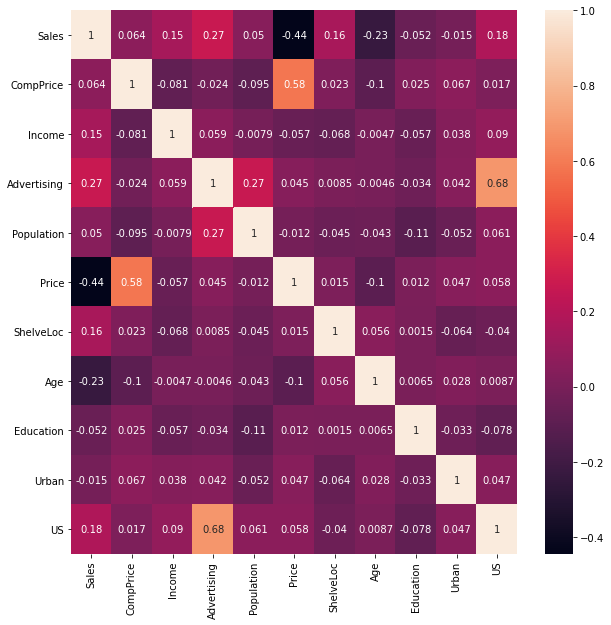

In [8]:
corr = comp.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [9]:
# Since the target variable is continious, we create a class of the value based on the mean
# <= 7.49 == "Small" and > 7.49 == "large"

In [10]:
def split(num):
    if num < 7.5:
        return "small"
    else:
        return "high"
    
comp.Sales=comp.Sales.apply(split)

In [11]:
y=comp.iloc[:,0]
x=comp.iloc[:,1:11]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
y_train.value_counts()

high     161
small    159
Name: Sales, dtype: int64

In [13]:
model =RF(n_jobs=3,n_estimators = 15, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [14]:
model.oob_score_

0.75625

In [15]:
pred_train = model.predict(x_train)

In [16]:
accuracy_score(y_train,pred_train)

1.0

In [17]:
confusion_matrix(y_train,pred_train)

array([[161,   0],
       [  0, 159]], dtype=int64)

In [18]:
pred_test = model.predict(x_test)

In [19]:
accuracy_score(y_test,pred_test)

0.7375

In [20]:
confusion_matrix(y_test,pred_test)

array([[27, 11],
       [10, 32]], dtype=int64)

In [21]:
comp =pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [22]:
comp

,Actual,Predicted
34,small,small
291,small,high
62,small,small
190,high,high
77,high,high
...,...,...
137,small,small
309,high,high
54,small,small
367,high,high


In [23]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.256959
6,Age,0.158912
0,CompPrice,0.123335
5,ShelveLoc,0.122032
2,Advertising,0.095493
1,Income,0.089670
3,Population,0.078378
7,Education,0.051788
8,Urban,0.012353
9,US,0.011082


In [ ]:
# Conclusion :
# Since the accuracy of the Training set is 99.4% we test the accurancy on the test data which is 83.7% .
# As seen in the confusion matrix of Test data 67 instances are presdected correctly and 13 instances are not.
# As seen in the above table Price is most important feature.
